# Homework 1: Basics of machine learning and feedforward neural networks

### Name: [INPUT-YOUR NAME]

## This assignment includes:

## 1. Mathematical questions (20 points)

## 2. Coding in Python (pytorch): train softmax classifiers on MNIST (80 points)

2.0 Install and configure: python ([Anaconda platform](https://docs.anaconda.com/anaconda/install/) recommended), [Jupyter Notebook](https://jupyter.org/install) and [pytorch](https://pytorch.org/get-started/) 

2.1 Read provided code (with pytorch) 

2.2 Complete the code of mini-batch SGD for linear softmax classifier

2.3 Record and plot results to show the loss and accuracy convergence (against #epoch)

2.4 Complete the code of multilayer feedforward network and train the nonlinear models

## Submission:

* Convert the ipynb file to html file (**save the execution outputs**)
    
* Upload both your ipynb and html files to blackboard.

* Deadline: Feb 28, 11:59:59 PM, Pacific time.

## Hints for the coding part:

1. If you are more comfortable to use other libraries such as Keras and TensorFlow, you can change the code accordingly.

2. Implement your code using the computation of vectors and matrics, rather than the for-loop to compute each element in vectors and matrics.

3. Plots should be clear and easy to read.

# 1. Mathematical questions:

## 1.1. Equivalence between: MLE using Bernoulli distribution and logistic regression

Read Section 5.5, 6.2.2.2, 6.2.2.3 in [Deep Learning Book](https://www.deeplearningbook.org/). Explain why logistic regression is equivalent to Maximum likelihood estimation.

Optional reading material that may help: [this lecture notes](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf), Section 12.2.1 and 12.2.2.

MLE form is Y = B0 + B1*X. Logistic regression is in the form of 1 and 0. In the application, it doesn't matter if B1 is set to 0. Assume a value, the value of game clearance and game duration. P(y|PlayTime), P(y=[1,0,1,0,1,1,0]|PlayTime=[10,20,12,13,30,20,10]) In logistic regression, We don’t need to guess the probability directly. We find B0 and B1 by gradient descent to minimize this cost function

## 1.2. Determine the convexity of a function

1.2.1. Suppose we have a functioin $f({\bf x}) = \log( \sum_{i=1}^n \exp(x_i) )$, where ${\bf x} \in \mathbb R^d$ and $x_i$ is the $i$-th element of ${\bf x}$ (so {\bf x} is a vector and $x_i$ is a scalar). 

Question: is $f({\bf x})$ a convex function?

Answer:


1.2.2. We introduced logistic regression for binary classification. Its objective function is 
\begin{align*}
f({\bf w}) = \frac{1}{n} \sum_{i=1}^n \log( 1 + \exp( - y_i {\bf w}^\top {\bf x}_i ) ) + \frac{\lambda}{2} \| {\bf w} \|^2  ,
\end{align*}
where ${\bf x}_i \in \mathbb R^d, y_i \in \{ -1, +1 \}$. 

Question: is the above objective function convex or not?

Answer:
No, deriviative of \begin{align*}
f({\bf w}) = \frac{1}{n} \sum_{i=1}^n \log( 1 + \exp( - y_i {\bf w}^\top {\bf x}_i ) ) + \frac{\lambda}{2} \| {\bf w} \|^2  ,
\end{align*}
where ${\bf x}_i \in \mathbb R^d, y_i \in \{ -1, +1 \}$. 
is -w+𝜆w. while 𝜆=1, it is not convex.
second derivative of function is 𝜆-1.
when 𝜆-1>0 it is convex
𝜆-1<0 it is not convex

**Example:**
We can use the second order derivatives $\nabla^2 f$ to see whether a function $f$ is convex: if the second order derivatives are positive definite (when $f$ has vector inputs), or positive number (when $f$ has scalar inputs). Suppose $f({\bf x}) = 1/2 * {\bf x}^\top {\bf x}$. Then we compute its first order and second order derivative:
\begin{align*}
&
\nabla f({\bf x}) = {\bf x} \\
&
\nabla^2 f({\bf x}) = {\bf 1} ,
\end{align*}
where ${\bf 1}$ is positive definite ([why?](https://math.stackexchange.com/questions/263957/why-is-the-identity-the-only-symmetric-0-1-matrix-with-all-eigenvalues-posit#:~:text=It%20does%20not%20give%20much,simultaneously%20has%20all%20three%20properties.&text=Symmetric%20and%20all%20eigenvalues%20positive,1's%20on%20its%20diagonal.)).

Hint: you can find how to compute derivatives of vectors/matrics in Section 2 in [The Matrix Cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)

# 2. Coding

## 2.1. (Read and run) Load MNIST dataset using pytorch and scale features

In [2]:
import matplotlib.pyplot as plt
import numpy
from torchvision import datasets, transforms

train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

x_train = train_set.data.numpy()
x_train = x_train.reshape(len(x_train),-1)
x_test = test_set.data.numpy()
x_test = x_test.reshape(len(x_test),-1)

y_train = train_set.targets.numpy()
y_test = test_set.targets.numpy()

print('Shape of x_train: ' + str(x_train.shape))
print('Shape of x_test: ' + str(x_test.shape))

print('Shape of y_train: ' + str(y_train.shape))
print('Shape of y_test: ' + str(y_test.shape))

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train, axis=0).reshape(1, d)
sig = numpy.std(x_train, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

Shape of x_train: (60000, 784)
Shape of x_test: (10000, 784)
Shape of y_train: (60000,)
Shape of y_test: (10000,)


## 2.2. (Read and run) Visualize a random image

Its label is
7


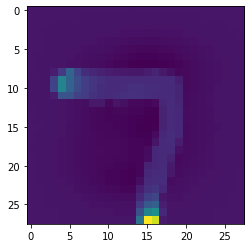

In [6]:
d = x_train.shape[0]
random_index = numpy.random.randint(d, size=1)[0]
plt.imshow(x_train[random_index].reshape(28,28))
print('Its label is')
print(y_train[random_index])

## 2.3. (Read and run) Define softmax function and cross entropy loss

In [7]:
def softmax(z):
    """implement the softmax functions
    input: numpy ndarray
    output: numpy ndarray
    """
    exp_list = numpy.exp(z)
    result = 1/sum(exp_list) * exp_list
    result = result.reshape((len(z),1))
    assert (result.shape == (len(z),1))
    return result

def neg_log_loss(pred, label):
    """implement the negative log loss"""
    loss = -numpy.log(pred[int(label)])
    return loss

## 2.4 (Read and run) Functions for implementing linear softmax classifier

In [8]:
import os
import sys
import json

root = os.path.abspath('.')
root += '/configs/'

def loadConfig(name):
    """ Read a configuration file as a dictionary"""
    full_path = root + name
    json_file = open(full_path, 'r')
    cfg = json.load(json_file)
    json_file.close()
    return cfg  

def initialize(num_inputs,num_classes):
    """initialize the parameters"""
    # num_inputs = 28*28 = 784
    # num_classes = 10
    w = numpy.zeros((num_classes, num_inputs)) # (10*784)
    b = numpy.zeros((num_classes, 1)) # (10*1) 
    
    param = {
        'w' : w, # (10*784)
        'b' : b  # (10*1)
    }
    return param

def eval(param, hyp, x_data, y_data):
    """ implement the evaluation function
    input: param -- parameters dictionary (w, b)
           hyp -- hyper-parameter: we use hyp['lambda'] to compute regularization
           x_data -- x_train or x_test (size, 784)
           y_data -- y_train or y_test (size,)
    output: loss and accuracy
    """
    
    reg_lambda = hyp['lambda']
    
    # w: (10*784), x: (10000*784), y:(10000,)
    loss_list = []
    w = param['w'].transpose()
    b = param['b'].transpose()
    dist = numpy.array([numpy.squeeze(softmax(numpy.matmul(x_data[i], w))) for i in range(len(y_data))])

    result = numpy.argmax(dist,axis=1)
    accuracy = sum(result == y_data)/float(len(y_data))

    loss_list = [neg_log_loss(dist[i],y_data[i]) for i in range(len(y_data))]
    loss = sum(loss_list) / len(loss_list) + reg_lambda/2 * numpy.sum(w * w) + reg_lambda/2 * numpy.sum(b * b)
    return loss, accuracy

def train(param, hyp, x_train, y_train, x_test, y_test,cfg_idx):
    """ implement the train function
    input: param -- parameters dictionary (w, b)
           hyp -- hyperparameters dictionary
           x_train -- (60000, 784)
           y_train -- (60000,)
           x_test -- x_test (10000, 784)
           y_test -- y_test (10000,)
    output: train_loss_list, train_acc_list, test_loss_list, test_acc_list
           Four lists contain the epoch-wise loss function on training data, accuracy on training data, loss function on testing data, accuracy on testing data, respectively
    """
    num_epoches = hyp['num_epoches']
    batch_size = hyp['batch_size']
    learning_rate = hyp['learning_rate']
    mu = hyp['mu']
    reg_lambda = hyp['lambda']
    train_loss_list, train_acc_list, test_loss_list, test_acc_list = [],[],[],[]
    if bool(hyp['momentum']) == True:
        w_velocity = numpy.zeros(param['w'].shape)
        b_velocity = numpy.zeros(param['b'].shape) 

    for epoch in range(num_epoches):
        
        # select the random sequence of training set
        rand_indices = numpy.random.choice(x_train.shape[0],x_train.shape[0],replace=False)
        num_batch = int(x_train.shape[0]/batch_size)
        
        if bool(hyp['learning_decay']) == True:
            try:
                if test_acc_list[-1] - test_acc_list[-2] < 0.001:
                    learning_rate *= hyp['decay_factor']
            except:
                pass
            
            message = 'learning rate: %.8f' % learning_rate
            print(message)
            logging.info(message)

        # for each batch of train data
        for batch in range(num_batch):
            index = rand_indices[batch_size*batch:batch_size*(batch+1)]
            x_batch = x_train[index]
            y_batch = y_train[index]

            # calculate the stochastic gradient w.r.t w and b
            dw, db, batch_loss = mini_batch_gradient(param, x_batch, y_batch, reg_lambda)

            param['w'] -= learning_rate * dw
            param['b'] -= learning_rate * db
            
            if (batch+1) % 100 == 0:
                message = 'Epoch [%d/%d], Batch [%d/%d], Loss %.4f' % (epoch+1, num_epoches, batch+1, num_batch, batch_loss)
                print(message)

        train_loss, train_acc = eval(param,hyp,x_train,y_train)
        test_loss, test_acc = eval(param,hyp,x_test,y_test)
        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        test_loss_list.append(test_loss)
        test_acc_list.append(test_acc)

        message = 'Epoch %d/%d, Train Loss %.4f, Train Acc %.4f, Test Loss %.4f, Test Acc %.4f' % (epoch+1, num_epoches, train_loss, train_acc, test_loss, test_acc)
        print(message)
        logging.info(message)
    return train_loss_list, train_acc_list, test_loss_list, test_acc_list


def plot(train_loss_list, train_acc_list, test_loss_list, test_acc_list, cfg_idx):
    """store the plots"""
    # epoch_list = list(range(len(loss_list)))
    plt.plot(train_loss_list, '-b', label='train loss')
    plt.plot(test_loss_list, '-r', label='test loss')
    plt.legend()
    plt.ylabel('Loss Function')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Loss Function ~ Epoch')
    plt.savefig('assets/loss_{}.png'.format(cfg_idx))
    plt.show()
    
    plt.plot(train_acc_list, '-b', label='train acc')
    plt.plot(test_acc_list, '-r', label='test acc')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Accuracy ~ Epoch')
    plt.savefig('assets/accr_{}.png'.format(cfg_idx))
    plt.show()
    

def main(cfg_idx): 
#     cfg_idx = args.config
    cfg_name = 'config_{}.json'.format(cfg_idx)
    hyperpara = loadConfig(cfg_name)

    # setting the random seed
    numpy.random.seed(1024)

    # initialize the parameters
    num_inputs = x_train.shape[1]
    num_classes = len(set(y_train))
    param = initialize(num_inputs,num_classes)

    # train the model
    train_loss_list, train_acc_list, test_loss_list, test_acc_list = train(param,hyperpara,x_train,y_train,x_test,y_test, cfg_idx)

    # plot the loss and accuracy
    plot(train_loss_list, train_acc_list, test_loss_list, test_acc_list, cfg_idx)

## 2.5. (To finish) Implementation of mini-batch SGD

In [9]:
# num_inputs = 784
# # def net(X, W, b):
# #     return softmax(nd.dot(X.reshape((-1, num_inputs)), W) + b)

# # def cross_entropy(y_hat, y):
# #     return -nd.pick(y_hat, y).log()


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pdb;
def mini_batch_gradient(param, x_batch, y_batch, reg_lambda):
    """implement the function to compute the mini batch gradient
    input: param -- parameters dictionary (w, b)
           x_batch -- a batch of x (size, 784)
           y_batch -- a batch of y (size,)
           reg_lambda -- regularization parameter
    output: 
           dw -- derivative for weight w
           db -- derivative for bias b
           batch_loss -- average loss on the mini-batch samples

    """
    
    # Your code goes here
#     batch_size = x_batch.shape[0]
    
#     w_grad_list = []
#     b_grad_list = []
# #     dw = w.attach_grad()
# #     db = b.attach_grad()
    
#     batch_loss = 0    
# #     arr = numpy.asarray(lst)
    
# #     X = numpy.asarray(x_batch)
# #     y = numpy.asarray(y_batch)
# #     X = nd.array(x_batch)
# #     y = nd.array(y_batch)
#     for i in range(batch_size):
#         X, y = x_batch[i], y_batch[i]
        
#         w = param["w"]
#         b = param["b"]
        
#         X = X.reshape((784, 1))
#         E = np.zeros((10,1)) #(101)
#         E[y][0] = 1 
#         pred = softmax(np.dot(w, X)+b)

    
#         loss = neg_log_loss(pred, y)
        
#         batch_loss += loss

#         w_grad = E - pred
#         w_grad = - np.dot(w_grad, X.reshape((1,784)))
#         w_grad_list.append(w_grad)

#         b_grad = -(E - pred)
#         b_grad_list.append(b_grad)
    
#     dw = sum(w_grad_list)/batch_size
#     db = sum(b_grad_list)/batch_size
#     return dw, db, batch_loss
    batch_size = x_batch.shape[0] 
    w_grad_list = []
    b_grad_list = []
    batch_loss = 0
    for i in range(batch_size):
        x,y = x_batch[i],y_batch[i]
        x = x.reshape((784,1))
        E = np.zeros((10,1)) 
        E[y][0] = 1 
        predicted = softmax(np.dot(param["w"], x) + param["b"]) #(10*1)

        loss = neg_log_loss(predicted, y)
        batch_loss += loss

        w_grad = E - predicted
        w_grad = - np.matmul(w_grad, x.reshape((1,784)))
        w_grad_list.append(w_grad)

        b_grad = -(E - predicted)
        b_grad_list.append(b_grad)

    dw = sum(w_grad_list)/batch_size
    db = sum(b_grad_list)/batch_size
    return dw, db, batch_loss

## 2.6. (Read and run) Train your model using the provided configuration (in *configs/config_sample.json*) untill convergence 

Epoch [1/3], Batch [100/600], Loss 27.7870
Epoch [1/3], Batch [200/600], Loss 31.7094
Epoch [1/3], Batch [300/600], Loss 20.3683
Epoch [1/3], Batch [400/600], Loss 33.6600
Epoch [1/3], Batch [500/600], Loss 39.2098
Epoch [1/3], Batch [600/600], Loss 29.2251
Epoch 1/3, Train Loss 0.3052, Train Acc 0.9170, Test Loss 0.3130, Test Acc 0.9155
Epoch [2/3], Batch [100/600], Loss 18.9248
Epoch [2/3], Batch [200/600], Loss 29.3834
Epoch [2/3], Batch [300/600], Loss 26.4127
Epoch [2/3], Batch [400/600], Loss 21.9789
Epoch [2/3], Batch [500/600], Loss 29.2115
Epoch [2/3], Batch [600/600], Loss 42.7187
Epoch 2/3, Train Loss 0.2902, Train Acc 0.9197, Test Loss 0.3323, Test Acc 0.9167
Epoch [3/3], Batch [100/600], Loss 32.8043
Epoch [3/3], Batch [200/600], Loss 32.9223
Epoch [3/3], Batch [300/600], Loss 35.9896
Epoch [3/3], Batch [400/600], Loss 28.1100
Epoch [3/3], Batch [500/600], Loss 15.0859
Epoch [3/3], Batch [600/600], Loss 26.9218
Epoch 3/3, Train Loss 0.2914, Train Acc 0.9201, Test Loss 0.33

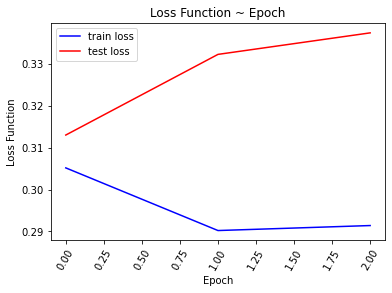

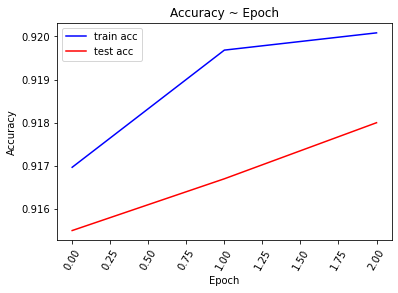

In [11]:
if __name__ == "__main__":

    cfg_idx = 'sample'
    
    import logging
    logging.basicConfig(filename="./logs/{}.log".format(cfg_idx), filemode="w", format="%(message)s", level=logging.DEBUG)
    
    main(cfg_idx)

## 2.7. (To finish) Does $\lambda$ impact the accuracy on training and testing data?

Please use different values for $\lambda \in \{ 0, 0.0001, 0.001, 0.01, 0.1, 1 \}$ in the above linear classifier.
For the six values of $\lambda$:

(1) Plot loss function values on training and testing data.

(2) Plot accuracy on training data and testing data.

(3) Use these plots to conclude whether regularization may help generalization performance, and explain why you can draw this conclusion.

Epoch [1/3], Batch [100/600], Loss 27.7870
Epoch [1/3], Batch [200/600], Loss 31.7094
Epoch [1/3], Batch [300/600], Loss 20.3683
Epoch [1/3], Batch [400/600], Loss 33.6600
Epoch [1/3], Batch [500/600], Loss 39.2098
Epoch [1/3], Batch [600/600], Loss 29.2251
Epoch 1/3, Train Loss 0.3052, Train Acc 0.9170, Test Loss 0.3130, Test Acc 0.9155
Epoch [2/3], Batch [100/600], Loss 18.9248
Epoch [2/3], Batch [200/600], Loss 29.3834
Epoch [2/3], Batch [300/600], Loss 26.4127
Epoch [2/3], Batch [400/600], Loss 21.9789
Epoch [2/3], Batch [500/600], Loss 29.2115
Epoch [2/3], Batch [600/600], Loss 42.7187
Epoch 2/3, Train Loss 0.2902, Train Acc 0.9197, Test Loss 0.3323, Test Acc 0.9167
Epoch [3/3], Batch [100/600], Loss 32.8043
Epoch [3/3], Batch [200/600], Loss 32.9223
Epoch [3/3], Batch [300/600], Loss 35.9896
Epoch [3/3], Batch [400/600], Loss 28.1100
Epoch [3/3], Batch [500/600], Loss 15.0859
Epoch [3/3], Batch [600/600], Loss 26.9218
Epoch 3/3, Train Loss 0.2914, Train Acc 0.9201, Test Loss 0.33

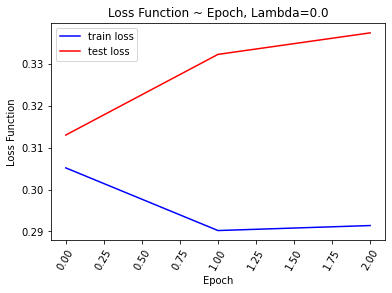

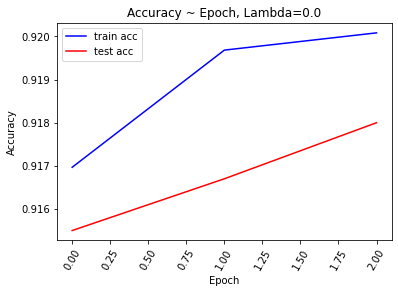

In [15]:
# Your code goes here
import matplotlib.pyplot as plt
import numpy
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import pdb;
import os
import sys
import json

def eval(param, hyp, x_data, y_data):
    reg_lambda = 0.0
    
    # w: (10*784), x: (10000*784), y:(10000,)
    loss_list = []
    w = param['w'].transpose()
    b = param['b'].transpose()
    dist = numpy.array([numpy.squeeze(softmax(numpy.matmul(x_data[i], w))) for i in range(len(y_data))])

    result = numpy.argmax(dist,axis=1)
    accuracy = sum(result == y_data)/float(len(y_data))

    loss_list = [neg_log_loss(dist[i],y_data[i]) for i in range(len(y_data))]
    loss = sum(loss_list) / len(loss_list) + reg_lambda/2 * numpy.sum(w * w) + reg_lambda/2 * numpy.sum(b * b)
    return loss, accuracy


def plot(train_loss_list, train_acc_list, test_loss_list, test_acc_list, cfg_idx):
    """store the plots"""
    # epoch_list = list(range(len(loss_list)))
    plt.plot(train_loss_list, '-b', label='train loss')
    plt.plot(test_loss_list, '-r', label='test loss')
    plt.legend()
    plt.ylabel('Loss Function')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Loss Function ~ Epoch, Lambda=0.0')
    plt.savefig('assets/loss_{}.png'.format(cfg_idx))
    plt.show()
    
    plt.plot(train_acc_list, '-b', label='train acc')
    plt.plot(test_acc_list, '-r', label='test acc')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Accuracy ~ Epoch, Lambda=0.0')
    plt.savefig('assets/accr_{}.png'.format(cfg_idx))
    plt.show()
    

def main(cfg_idx): 
#     cfg_idx = args.config
    
    cfg_name = 'config_{}.json'.format(cfg_idx)
    hyperpara = loadConfig(cfg_name)

    # setting the random seed
    numpy.random.seed(1024)

    # initialize the parameters
    num_inputs = x_train.shape[1]
    num_classes = len(set(y_train))
    param = initialize(num_inputs,num_classes)

    # train the model
    train_loss_list, train_acc_list, test_loss_list, test_acc_list = train(param,hyperpara,x_train,y_train,x_test,y_test, cfg_idx)

    # plot the loss and accuracy
    plot(train_loss_list, train_acc_list, test_loss_list, test_acc_list, cfg_idx)

if __name__ == "__main__":
    
    cfg_idx = 'sample'
    
    import logging
    logging.basicConfig(filename="./logs/{}.log".format(cfg_idx), filemode="w", format="%(message)s", level=logging.DEBUG)
    
    main(cfg_idx)

Epoch [1/3], Batch [100/600], Loss 27.7870
Epoch [1/3], Batch [200/600], Loss 31.7094
Epoch [1/3], Batch [300/600], Loss 20.3683
Epoch [1/3], Batch [400/600], Loss 33.6600
Epoch [1/3], Batch [500/600], Loss 39.2098
Epoch [1/3], Batch [600/600], Loss 29.2251
Epoch 1/3, Train Loss 0.3061, Train Acc 0.9170, Test Loss 0.3139, Test Acc 0.9155
Epoch [2/3], Batch [100/600], Loss 18.9248
Epoch [2/3], Batch [200/600], Loss 29.3834
Epoch [2/3], Batch [300/600], Loss 26.4127
Epoch [2/3], Batch [400/600], Loss 21.9789
Epoch [2/3], Batch [500/600], Loss 29.2115
Epoch [2/3], Batch [600/600], Loss 42.7187
Epoch 2/3, Train Loss 0.2914, Train Acc 0.9197, Test Loss 0.3335, Test Acc 0.9167
Epoch [3/3], Batch [100/600], Loss 32.8043
Epoch [3/3], Batch [200/600], Loss 32.9223
Epoch [3/3], Batch [300/600], Loss 35.9896
Epoch [3/3], Batch [400/600], Loss 28.1100
Epoch [3/3], Batch [500/600], Loss 15.0859
Epoch [3/3], Batch [600/600], Loss 26.9218
Epoch 3/3, Train Loss 0.2929, Train Acc 0.9201, Test Loss 0.33

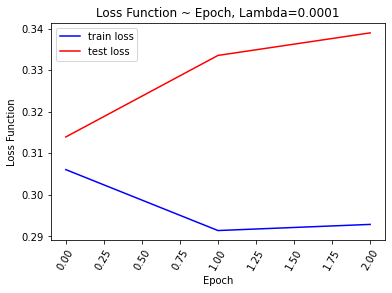

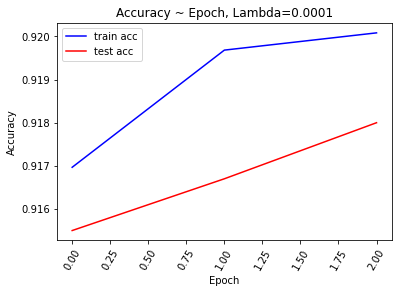

In [16]:
import matplotlib.pyplot as plt
import numpy
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import pdb;
import os
import sys
import json

def eval(param, hyp, x_data, y_data):
    reg_lambda = 0.0001
    
    # w: (10*784), x: (10000*784), y:(10000,)
    loss_list = []
    w = param['w'].transpose()
    b = param['b'].transpose()
    dist = numpy.array([numpy.squeeze(softmax(numpy.matmul(x_data[i], w))) for i in range(len(y_data))])

    result = numpy.argmax(dist,axis=1)
    accuracy = sum(result == y_data)/float(len(y_data))

    loss_list = [neg_log_loss(dist[i],y_data[i]) for i in range(len(y_data))]
    loss = sum(loss_list) / len(loss_list) + reg_lambda/2 * numpy.sum(w * w) + reg_lambda/2 * numpy.sum(b * b)
    return loss, accuracy


def plot(train_loss_list, train_acc_list, test_loss_list, test_acc_list, cfg_idx):
    """store the plots"""
    # epoch_list = list(range(len(loss_list)))
    plt.plot(train_loss_list, '-b', label='train loss')
    plt.plot(test_loss_list, '-r', label='test loss')
    plt.legend()
    plt.ylabel('Loss Function')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Loss Function ~ Epoch, Lambda=0.0001')
    plt.savefig('assets/loss_{}.png'.format(cfg_idx))
    plt.show()
    
    plt.plot(train_acc_list, '-b', label='train acc')
    plt.plot(test_acc_list, '-r', label='test acc')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Accuracy ~ Epoch, Lambda=0.0001')
    plt.savefig('assets/accr_{}.png'.format(cfg_idx))
    plt.show()
    

def main(cfg_idx): 
#     cfg_idx = args.config
    
    cfg_name = 'config_{}.json'.format(cfg_idx)
    hyperpara = loadConfig(cfg_name)

    # setting the random seed
    numpy.random.seed(1024)

    # initialize the parameters
    num_inputs = x_train.shape[1]
    num_classes = len(set(y_train))
    param = initialize(num_inputs,num_classes)

    # train the model
    train_loss_list, train_acc_list, test_loss_list, test_acc_list = train(param,hyperpara,x_train,y_train,x_test,y_test, cfg_idx)

    # plot the loss and accuracy
    plot(train_loss_list, train_acc_list, test_loss_list, test_acc_list, cfg_idx)

if __name__ == "__main__":
    
    cfg_idx = 'sample'
    
    import logging
    logging.basicConfig(filename="./logs/{}.log".format(cfg_idx), filemode="w", format="%(message)s", level=logging.DEBUG)
    
    main(cfg_idx)
    

Epoch [1/3], Batch [100/600], Loss 27.7870
Epoch [1/3], Batch [200/600], Loss 31.7094
Epoch [1/3], Batch [300/600], Loss 20.3683
Epoch [1/3], Batch [400/600], Loss 33.6600
Epoch [1/3], Batch [500/600], Loss 39.2098
Epoch [1/3], Batch [600/600], Loss 29.2251
Epoch 1/3, Train Loss 0.3139, Train Acc 0.9170, Test Loss 0.3217, Test Acc 0.9155
Epoch [2/3], Batch [100/600], Loss 18.9248
Epoch [2/3], Batch [200/600], Loss 29.3834
Epoch [2/3], Batch [300/600], Loss 26.4127
Epoch [2/3], Batch [400/600], Loss 21.9789
Epoch [2/3], Batch [500/600], Loss 29.2115
Epoch [2/3], Batch [600/600], Loss 42.7187
Epoch 2/3, Train Loss 0.3022, Train Acc 0.9197, Test Loss 0.3443, Test Acc 0.9167
Epoch [3/3], Batch [100/600], Loss 32.8043
Epoch [3/3], Batch [200/600], Loss 32.9223
Epoch [3/3], Batch [300/600], Loss 35.9896
Epoch [3/3], Batch [400/600], Loss 28.1100
Epoch [3/3], Batch [500/600], Loss 15.0859
Epoch [3/3], Batch [600/600], Loss 26.9218
Epoch 3/3, Train Loss 0.3062, Train Acc 0.9201, Test Loss 0.35

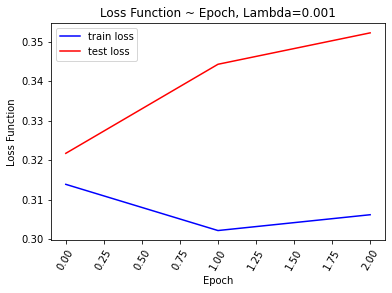

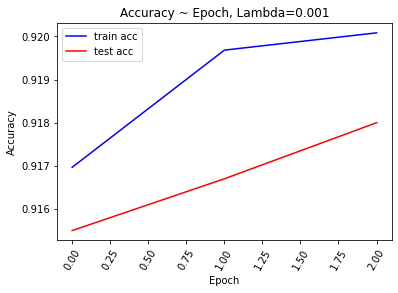

In [17]:
import matplotlib.pyplot as plt
import numpy
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import pdb;
import os
import sys
import json

def eval(param, hyp, x_data, y_data):
    reg_lambda = 0.001
    
    # w: (10*784), x: (10000*784), y:(10000,)
    loss_list = []
    w = param['w'].transpose()
    b = param['b'].transpose()
    dist = numpy.array([numpy.squeeze(softmax(numpy.matmul(x_data[i], w))) for i in range(len(y_data))])

    result = numpy.argmax(dist,axis=1)
    accuracy = sum(result == y_data)/float(len(y_data))

    loss_list = [neg_log_loss(dist[i],y_data[i]) for i in range(len(y_data))]
    loss = sum(loss_list) / len(loss_list) + reg_lambda/2 * numpy.sum(w * w) + reg_lambda/2 * numpy.sum(b * b)
    return loss, accuracy


def plot(train_loss_list, train_acc_list, test_loss_list, test_acc_list, cfg_idx):
    """store the plots"""
    # epoch_list = list(range(len(loss_list)))
    plt.plot(train_loss_list, '-b', label='train loss')
    plt.plot(test_loss_list, '-r', label='test loss')
    plt.legend()
    plt.ylabel('Loss Function')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Loss Function ~ Epoch, Lambda=0.001')
    plt.savefig('assets/loss_{}.png'.format(cfg_idx))
    plt.show()
    
    plt.plot(train_acc_list, '-b', label='train acc')
    plt.plot(test_acc_list, '-r', label='test acc')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Accuracy ~ Epoch, Lambda=0.001')
    plt.savefig('assets/accr_{}.png'.format(cfg_idx))
    plt.show()
    

def main(cfg_idx): 
#     cfg_idx = args.config
    
    cfg_name = 'config_{}.json'.format(cfg_idx)
    hyperpara = loadConfig(cfg_name)

    # setting the random seed
    numpy.random.seed(1024)

    # initialize the parameters
    num_inputs = x_train.shape[1]
    num_classes = len(set(y_train))
    param = initialize(num_inputs,num_classes)

    # train the model
    train_loss_list, train_acc_list, test_loss_list, test_acc_list = train(param,hyperpara,x_train,y_train,x_test,y_test, cfg_idx)

    # plot the loss and accuracy
    plot(train_loss_list, train_acc_list, test_loss_list, test_acc_list, cfg_idx)

if __name__ == "__main__":
    
    cfg_idx = 'sample'
    
    import logging
    logging.basicConfig(filename="./logs/{}.log".format(cfg_idx), filemode="w", format="%(message)s", level=logging.DEBUG)
    
    main(cfg_idx)
    

Epoch [1/3], Batch [100/600], Loss 27.7870
Epoch [1/3], Batch [200/600], Loss 31.7094
Epoch [1/3], Batch [300/600], Loss 20.3683
Epoch [1/3], Batch [400/600], Loss 33.6600
Epoch [1/3], Batch [500/600], Loss 39.2098
Epoch [1/3], Batch [600/600], Loss 29.2251
Epoch 1/3, Train Loss 0.3920, Train Acc 0.9170, Test Loss 0.3999, Test Acc 0.9155
Epoch [2/3], Batch [100/600], Loss 18.9248
Epoch [2/3], Batch [200/600], Loss 29.3834
Epoch [2/3], Batch [300/600], Loss 26.4127
Epoch [2/3], Batch [400/600], Loss 21.9789
Epoch [2/3], Batch [500/600], Loss 29.2115
Epoch [2/3], Batch [600/600], Loss 42.7187
Epoch 2/3, Train Loss 0.4098, Train Acc 0.9197, Test Loss 0.4520, Test Acc 0.9167
Epoch [3/3], Batch [100/600], Loss 32.8043
Epoch [3/3], Batch [200/600], Loss 32.9223
Epoch [3/3], Batch [300/600], Loss 35.9896
Epoch [3/3], Batch [400/600], Loss 28.1100
Epoch [3/3], Batch [500/600], Loss 15.0859
Epoch [3/3], Batch [600/600], Loss 26.9218
Epoch 3/3, Train Loss 0.4391, Train Acc 0.9201, Test Loss 0.48

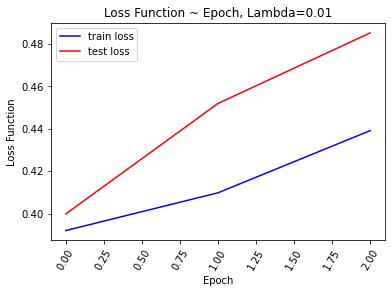

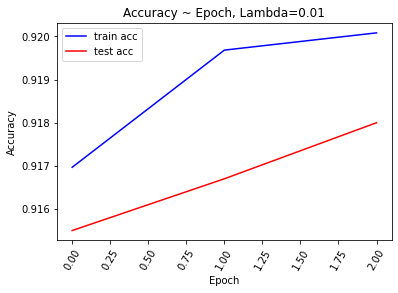

In [18]:
import matplotlib.pyplot as plt
import numpy
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import pdb;
import os
import sys
import json

def eval(param, hyp, x_data, y_data):
    reg_lambda = 0.01
    
    # w: (10*784), x: (10000*784), y:(10000,)
    loss_list = []
    w = param['w'].transpose()
    b = param['b'].transpose()
    dist = numpy.array([numpy.squeeze(softmax(numpy.matmul(x_data[i], w))) for i in range(len(y_data))])

    result = numpy.argmax(dist,axis=1)
    accuracy = sum(result == y_data)/float(len(y_data))

    loss_list = [neg_log_loss(dist[i],y_data[i]) for i in range(len(y_data))]
    loss = sum(loss_list) / len(loss_list) + reg_lambda/2 * numpy.sum(w * w) + reg_lambda/2 * numpy.sum(b * b)
    return loss, accuracy


def plot(train_loss_list, train_acc_list, test_loss_list, test_acc_list, cfg_idx):
    """store the plots"""
    # epoch_list = list(range(len(loss_list)))
    plt.plot(train_loss_list, '-b', label='train loss')
    plt.plot(test_loss_list, '-r', label='test loss')
    plt.legend()
    plt.ylabel('Loss Function')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Loss Function ~ Epoch, Lambda=0.01')
    plt.savefig('assets/loss_{}.png'.format(cfg_idx))
    plt.show()
    
    plt.plot(train_acc_list, '-b', label='train acc')
    plt.plot(test_acc_list, '-r', label='test acc')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Accuracy ~ Epoch, Lambda=0.01')
    plt.savefig('assets/accr_{}.png'.format(cfg_idx))
    plt.show()
    

def main(cfg_idx): 
#     cfg_idx = args.config
    
    cfg_name = 'config_{}.json'.format(cfg_idx)
    hyperpara = loadConfig(cfg_name)

    # setting the random seed
    numpy.random.seed(1024)

    # initialize the parameters
    num_inputs = x_train.shape[1]
    num_classes = len(set(y_train))
    param = initialize(num_inputs,num_classes)

    # train the model
    train_loss_list, train_acc_list, test_loss_list, test_acc_list = train(param,hyperpara,x_train,y_train,x_test,y_test, cfg_idx)

    # plot the loss and accuracy
    plot(train_loss_list, train_acc_list, test_loss_list, test_acc_list, cfg_idx)

if __name__ == "__main__":
    
    cfg_idx = 'sample'
    
    import logging
    logging.basicConfig(filename="./logs/{}.log".format(cfg_idx), filemode="w", format="%(message)s", level=logging.DEBUG)
    
    main(cfg_idx)

Epoch [1/3], Batch [100/600], Loss 27.7870
Epoch [1/3], Batch [200/600], Loss 31.7094
Epoch [1/3], Batch [300/600], Loss 20.3683
Epoch [1/3], Batch [400/600], Loss 33.6600
Epoch [1/3], Batch [500/600], Loss 39.2098
Epoch [1/3], Batch [600/600], Loss 29.2251
Epoch 1/3, Train Loss 1.1737, Train Acc 0.9170, Test Loss 1.1816, Test Acc 0.9155
Epoch [2/3], Batch [100/600], Loss 18.9248
Epoch [2/3], Batch [200/600], Loss 29.3834
Epoch [2/3], Batch [300/600], Loss 26.4127
Epoch [2/3], Batch [400/600], Loss 21.9789
Epoch [2/3], Batch [500/600], Loss 29.2115
Epoch [2/3], Batch [600/600], Loss 42.7187
Epoch 2/3, Train Loss 1.4864, Train Acc 0.9197, Test Loss 1.5286, Test Acc 0.9167
Epoch [3/3], Batch [100/600], Loss 32.8043
Epoch [3/3], Batch [200/600], Loss 32.9223
Epoch [3/3], Batch [300/600], Loss 35.9896
Epoch [3/3], Batch [400/600], Loss 28.1100
Epoch [3/3], Batch [500/600], Loss 15.0859
Epoch [3/3], Batch [600/600], Loss 26.9218
Epoch 3/3, Train Loss 1.7688, Train Acc 0.9201, Test Loss 1.81

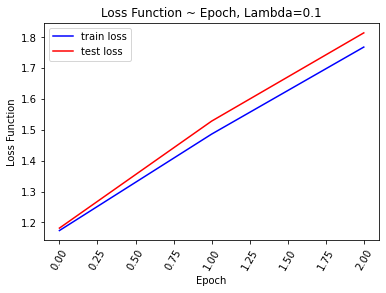

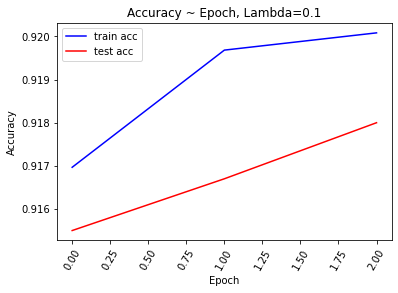

In [19]:
import matplotlib.pyplot as plt
import numpy
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import pdb;
import os
import sys
import json

def eval(param, hyp, x_data, y_data):
    reg_lambda = 0.1
    
    # w: (10*784), x: (10000*784), y:(10000,)
    loss_list = []
    w = param['w'].transpose()
    b = param['b'].transpose()
    dist = numpy.array([numpy.squeeze(softmax(numpy.matmul(x_data[i], w))) for i in range(len(y_data))])

    result = numpy.argmax(dist,axis=1)
    accuracy = sum(result == y_data)/float(len(y_data))

    loss_list = [neg_log_loss(dist[i],y_data[i]) for i in range(len(y_data))]
    loss = sum(loss_list) / len(loss_list) + reg_lambda/2 * numpy.sum(w * w) + reg_lambda/2 * numpy.sum(b * b)
    return loss, accuracy


def plot(train_loss_list, train_acc_list, test_loss_list, test_acc_list, cfg_idx):
    """store the plots"""
    # epoch_list = list(range(len(loss_list)))
    plt.plot(train_loss_list, '-b', label='train loss')
    plt.plot(test_loss_list, '-r', label='test loss')
    plt.legend()
    plt.ylabel('Loss Function')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Loss Function ~ Epoch, Lambda=0.1')
    plt.savefig('assets/loss_{}.png'.format(cfg_idx))
    plt.show()
    
    plt.plot(train_acc_list, '-b', label='train acc')
    plt.plot(test_acc_list, '-r', label='test acc')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Accuracy ~ Epoch, Lambda=0.1')
    plt.savefig('assets/accr_{}.png'.format(cfg_idx))
    plt.show()
    

def main(cfg_idx): 
#     cfg_idx = args.config
    
    cfg_name = 'config_{}.json'.format(cfg_idx)
    hyperpara = loadConfig(cfg_name)

    # setting the random seed
    numpy.random.seed(1024)

    # initialize the parameters
    num_inputs = x_train.shape[1]
    num_classes = len(set(y_train))
    param = initialize(num_inputs,num_classes)

    # train the model
    train_loss_list, train_acc_list, test_loss_list, test_acc_list = train(param,hyperpara,x_train,y_train,x_test,y_test, cfg_idx)

    # plot the loss and accuracy
    plot(train_loss_list, train_acc_list, test_loss_list, test_acc_list, cfg_idx)

if __name__ == "__main__":
    
    cfg_idx = 'sample'
    
    import logging
    logging.basicConfig(filename="./logs/{}.log".format(cfg_idx), filemode="w", format="%(message)s", level=logging.DEBUG)
    
    main(cfg_idx)

Epoch [1/3], Batch [100/600], Loss 27.7870
Epoch [1/3], Batch [200/600], Loss 31.7094
Epoch [1/3], Batch [300/600], Loss 20.3683
Epoch [1/3], Batch [400/600], Loss 33.6600
Epoch [1/3], Batch [500/600], Loss 39.2098
Epoch [1/3], Batch [600/600], Loss 29.2251
Epoch 1/3, Train Loss 8.9904, Train Acc 0.9170, Test Loss 8.9982, Test Acc 0.9155
Epoch [2/3], Batch [100/600], Loss 18.9248
Epoch [2/3], Batch [200/600], Loss 29.3834
Epoch [2/3], Batch [300/600], Loss 26.4127
Epoch [2/3], Batch [400/600], Loss 21.9789
Epoch [2/3], Batch [500/600], Loss 29.2115
Epoch [2/3], Batch [600/600], Loss 42.7187
Epoch 2/3, Train Loss 12.2525, Train Acc 0.9197, Test Loss 12.2946, Test Acc 0.9167
Epoch [3/3], Batch [100/600], Loss 32.8043
Epoch [3/3], Batch [200/600], Loss 32.9223
Epoch [3/3], Batch [300/600], Loss 35.9896
Epoch [3/3], Batch [400/600], Loss 28.1100
Epoch [3/3], Batch [500/600], Loss 15.0859
Epoch [3/3], Batch [600/600], Loss 26.9218
Epoch 3/3, Train Loss 15.0652, Train Acc 0.9201, Test Loss 1

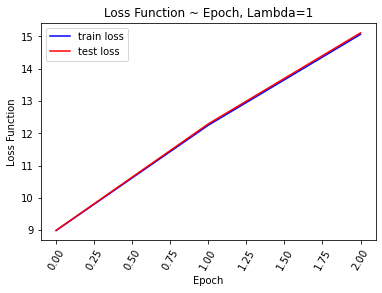

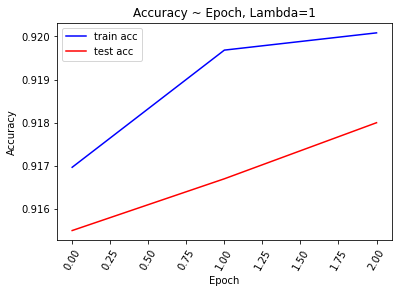

In [20]:
import matplotlib.pyplot as plt
import numpy
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import pdb;
import os
import sys
import json

def eval(param, hyp, x_data, y_data):
    reg_lambda = 1.0
    
    # w: (10*784), x: (10000*784), y:(10000,)
    loss_list = []
    w = param['w'].transpose()
    b = param['b'].transpose()
    dist = numpy.array([numpy.squeeze(softmax(numpy.matmul(x_data[i], w))) for i in range(len(y_data))])

    result = numpy.argmax(dist,axis=1)
    accuracy = sum(result == y_data)/float(len(y_data))

    loss_list = [neg_log_loss(dist[i],y_data[i]) for i in range(len(y_data))]
    loss = sum(loss_list) / len(loss_list) + reg_lambda/2 * numpy.sum(w * w) + reg_lambda/2 * numpy.sum(b * b)
    return loss, accuracy


def plot(train_loss_list, train_acc_list, test_loss_list, test_acc_list, cfg_idx):
    """store the plots"""
    # epoch_list = list(range(len(loss_list)))
    plt.plot(train_loss_list, '-b', label='train loss')
    plt.plot(test_loss_list, '-r', label='test loss')
    plt.legend()
    plt.ylabel('Loss Function')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Loss Function ~ Epoch, Lambda=1')
    plt.savefig('assets/loss_{}.png'.format(cfg_idx))
    plt.show()
    
    plt.plot(train_acc_list, '-b', label='train acc')
    plt.plot(test_acc_list, '-r', label='test acc')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Accuracy ~ Epoch, Lambda=1')
    plt.savefig('assets/accr_{}.png'.format(cfg_idx))
    plt.show()
    

def main(cfg_idx): 
#     cfg_idx = args.config
    
    cfg_name = 'config_{}.json'.format(cfg_idx)
    hyperpara = loadConfig(cfg_name)

    # setting the random seed
    numpy.random.seed(1024)

    # initialize the parameters
    num_inputs = x_train.shape[1]
    num_classes = len(set(y_train))
    param = initialize(num_inputs,num_classes)

    # train the model
    train_loss_list, train_acc_list, test_loss_list, test_acc_list = train(param,hyperpara,x_train,y_train,x_test,y_test, cfg_idx)

    # plot the loss and accuracy
    plot(train_loss_list, train_acc_list, test_loss_list, test_acc_list, cfg_idx)

if __name__ == "__main__":
    
    cfg_idx = 'sample'
    
    import logging
    logging.basicConfig(filename="./logs/{}.log".format(cfg_idx), filemode="w", format="%(message)s", level=logging.DEBUG)
    
    main(cfg_idx)

## 2.8. (Read and run) Train feedforward networks with one hidden layer (one activation layer)

In [25]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.00001)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/5], Step [100/600], Loss: 0.4576
Epoch [1/5], Step [200/600], Loss: 0.2094
Epoch [1/5], Step [300/600], Loss: 0.2689
Epoch [1/5], Step [400/600], Loss: 0.1511
Epoch [1/5], Step [500/600], Loss: 0.0971
Epoch [1/5], Step [600/600], Loss: 0.1080
Epoch [2/5], Step [100/600], Loss: 0.1409
Epoch [2/5], Step [200/600], Loss: 0.0939
Epoch [2/5], Step [300/600], Loss: 0.1565
Epoch [2/5], Step [400/600], Loss: 0.0402
Epoch [2/5], Step [500/600], Loss: 0.1085
Epoch [2/5], Step [600/600], Loss: 0.0467
Epoch [3/5], Step [100/600], Loss: 0.0285
Epoch [3/5], Step [200/600], Loss: 0.1629
Epoch [3/5], Step [300/600], Loss: 0.0865
Epoch [3/5], Step [400/600], Loss: 0.1588
Epoch [3/5], Step [500/600], Loss: 0.1782
Epoch [3/5], Step [600/600], Loss: 0.1183
Epoch [4/5], Step [100/600], Loss: 0.1042
Epoch [4/5], Step [200/600], Loss: 0.0818
Epoch [4/5], Step [300/600], Loss: 0.0654
Epoch [4/5], Step [400/600], Loss: 0.0296
Epoch [4/5], Step [500/600], Loss: 0.0253
Epoch [4/5], Step [600/600], Loss:

## 2.9. (To finish) Implement and train a feedforward network with two hidden layers (two activation layers)

After training: plot training and testing accuracy (against #epoches) and answer the question: is there performance difference between one-layer and two-layer network?

two-layer network is little better than one-layer network, compared with the Accs. 

Hint: modify class NeuralNet

In [26]:
# Your code goes here
# modify class NeuralNet

Epoch [1/5], Step [100/600], Loss: 0.2695
Epoch [1/5], Step [200/600], Loss: 0.2497
Epoch [1/5], Step [300/600], Loss: 0.1725
Epoch [1/5], Step [400/600], Loss: 0.0831
Epoch [1/5], Step [500/600], Loss: 0.1742
Epoch [1/5], Step [600/600], Loss: 0.1297
Accuracy of the network on the 10000 test images: 96.31 %
Epoch [2/5], Step [100/600], Loss: 0.0882
Epoch [2/5], Step [200/600], Loss: 0.0312
Epoch [2/5], Step [300/600], Loss: 0.1391
Epoch [2/5], Step [400/600], Loss: 0.0421
Epoch [2/5], Step [500/600], Loss: 0.1531
Epoch [2/5], Step [600/600], Loss: 0.0919
Accuracy of the network on the 10000 test images: 97.53 %
Epoch [3/5], Step [100/600], Loss: 0.0121
Epoch [3/5], Step [200/600], Loss: 0.0110
Epoch [3/5], Step [300/600], Loss: 0.0505
Epoch [3/5], Step [400/600], Loss: 0.0275
Epoch [3/5], Step [500/600], Loss: 0.0376
Epoch [3/5], Step [600/600], Loss: 0.1135
Accuracy of the network on the 10000 test images: 97.78 %
Epoch [4/5], Step [100/600], Loss: 0.0056
Epoch [4/5], Step [200/600],

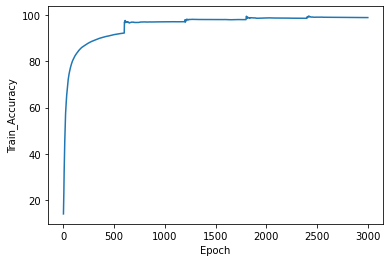

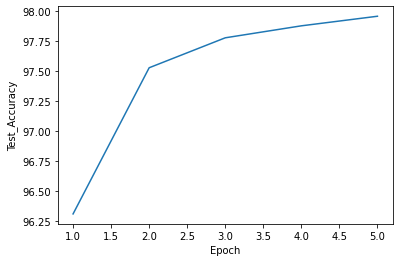

In [27]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from d2l import mxnet as d2l
from mxnet import gluon, autograd, np, npx, gluon
from IPython import display
from torch import nn

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 300) 
        self.fc3 =  nn.Linear(300, num_classes) 
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out
# *1* the training part of code can keep unchanged

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
Test_Accuracy = []
Train_Accuracy = []
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    correctTr = 0
    totalTr = 0
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # acc
        _, predictedTr = torch.max(outputs.data, 1)
        totalTr += labels.size(0)
        correctTr += (predictedTr == labels).sum().item()
        Train_Accuracy.append(100 * correctTr / totalTr)  
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
              
#     print(Train_Accuracy)

        
#     animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
#                             legend=['train loss', 'train acc', 'test acc'])
    # Test the model
    # In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        Test_Accuracy.append(100 * correct / total)
        print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

        
# *2* Code for plotting results
### Your code goes here
###   

plt.plot([i for i in range(3000)], Train_Accuracy)
plt.xlabel('Epoch')
plt.ylabel('Train_Accuracy')
plt.show()


plt.plot([1,2,3,4,5], Test_Accuracy)
plt.xlabel('Epoch')
plt.ylabel('Test_Accuracy')
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

## 2.10. (To finish) Use SGD (instead of Adam) to train your two-hidden-layer network

Hint: read [this document](https://pytorch.org/docs/stable/optim.html) for torch.optim to understand how to change optimization algorithm

Epoch [1/5], Step [100/600], Loss: 2.2962
Epoch [1/5], Step [200/600], Loss: 2.2951
Epoch [1/5], Step [300/600], Loss: 2.2886
Epoch [1/5], Step [400/600], Loss: 2.2803
Epoch [1/5], Step [500/600], Loss: 2.2856
Epoch [1/5], Step [600/600], Loss: 2.2818
Accuracy of the network on the 10000 test images: 28.09 %
Epoch [2/5], Step [100/600], Loss: 2.2692
Epoch [2/5], Step [200/600], Loss: 2.2717
Epoch [2/5], Step [300/600], Loss: 2.2671
Epoch [2/5], Step [400/600], Loss: 2.2635
Epoch [2/5], Step [500/600], Loss: 2.2543
Epoch [2/5], Step [600/600], Loss: 2.2576
Accuracy of the network on the 10000 test images: 47.55 %
Epoch [3/5], Step [100/600], Loss: 2.2378
Epoch [3/5], Step [200/600], Loss: 2.2411
Epoch [3/5], Step [300/600], Loss: 2.2318
Epoch [3/5], Step [400/600], Loss: 2.2262
Epoch [3/5], Step [500/600], Loss: 2.2229
Epoch [3/5], Step [600/600], Loss: 2.2032
Accuracy of the network on the 10000 test images: 61.71 %
Epoch [4/5], Step [100/600], Loss: 2.1998
Epoch [4/5], Step [200/600],

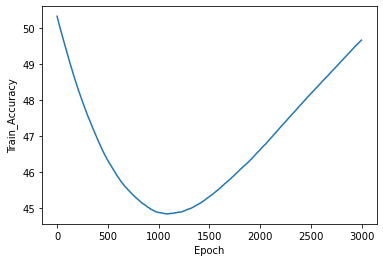

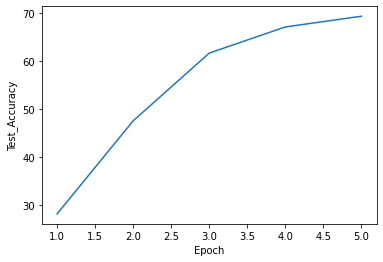

In [29]:
# Your code goes here
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from d2l import torch as d2l
from torch import nn
import torch.nn as nn

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 300)  
        self.fc3 =  nn.Linear(300, num_classes) 
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out   
# *1* the training part of code can keep unchanged

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
# SGD in 2 hidden layer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Test_Accuracy = []
Train_Accuracy = []
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # acc
        _, predictedTr = torch.max(outputs.data, 1)
        totalTr += labels.size(0)
        correctTr += (predictedTr == labels).sum().item()
        Train_Accuracy.append(100 * correctTr / totalTr)  
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Test the model
    # In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        Test_Accuracy.append(100 * correct / total)
        print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

        
# *2* Code for plotting results
### Your code goes here
###    
plt.plot([i for i in range(3000)], Train_Accuracy)
plt.xlabel('Epoch')
plt.ylabel('Train_Accuracy')
plt.show()


plt.plot([1,2,3,4,5], Test_Accuracy)
plt.xlabel('Epoch')
plt.ylabel('Test_Accuracy')
plt.show()
     

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')



# train(param, hyp, x_train, y_train, x_test, y_test, cfg_idx)
# train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

## 2.11. (To finish) Use SGD to train your two-hidden-layer network with different learning rate values in the range of $\{ 0, 0.0001, 0.001, 0.01, 0.1, 1 \}$, and show which learning rate achieves the best testing accuracy.

Learning Rate 0 Accuracy of the network on the 10000 test images: 12.71 %
Learning Rate 0 Accuracy of the network on the 10000 test images: 12.71 %
Learning Rate 0 Accuracy of the network on the 10000 test images: 12.71 %
Learning Rate 0 Accuracy of the network on the 10000 test images: 12.71 %
Learning Rate 0 Accuracy of the network on the 10000 test images: 12.71 %


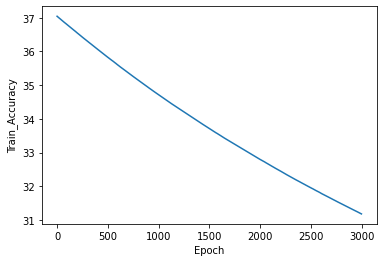

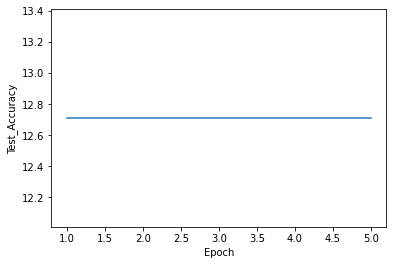

Learning Rate 0.0001 Accuracy of the network on the 10000 test images: 13.45 %
Learning Rate 0.0001 Accuracy of the network on the 10000 test images: 14.3 %
Learning Rate 0.0001 Accuracy of the network on the 10000 test images: 15.53 %
Learning Rate 0.0001 Accuracy of the network on the 10000 test images: 17.21 %
Learning Rate 0.0001 Accuracy of the network on the 10000 test images: 19.51 %


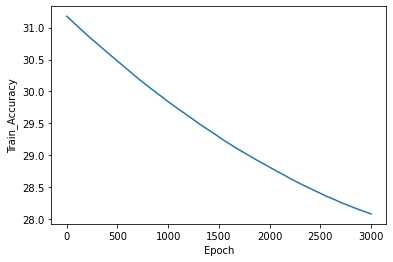

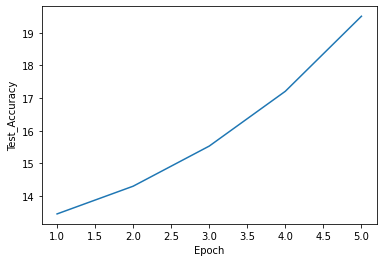

Learning Rate 0.001 Accuracy of the network on the 10000 test images: 49.89 %
Learning Rate 0.001 Accuracy of the network on the 10000 test images: 58.76 %
Learning Rate 0.001 Accuracy of the network on the 10000 test images: 59.59 %
Learning Rate 0.001 Accuracy of the network on the 10000 test images: 59.6 %
Learning Rate 0.001 Accuracy of the network on the 10000 test images: 60.17 %


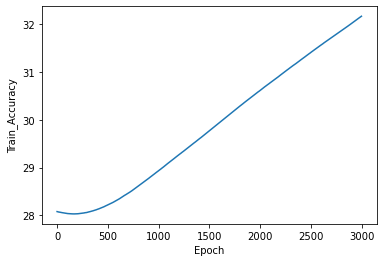

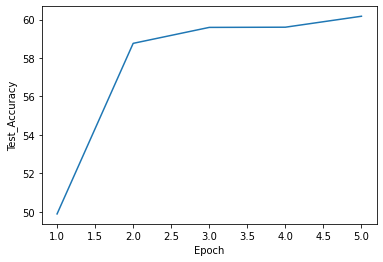

Learning Rate 0.01 Accuracy of the network on the 10000 test images: 83.46 %
Learning Rate 0.01 Accuracy of the network on the 10000 test images: 88.29 %
Learning Rate 0.01 Accuracy of the network on the 10000 test images: 89.74 %
Learning Rate 0.01 Accuracy of the network on the 10000 test images: 90.32 %
Learning Rate 0.01 Accuracy of the network on the 10000 test images: 90.84 %


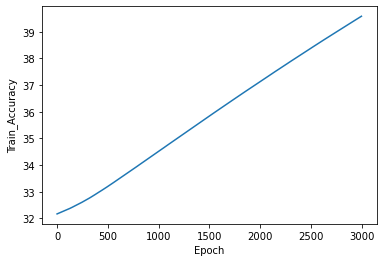

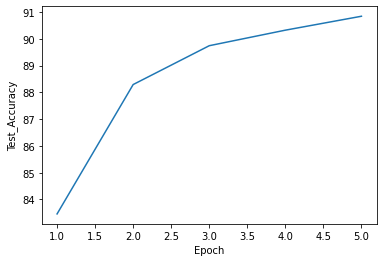

Learning Rate 0.1 Accuracy of the network on the 10000 test images: 93.13 %
Learning Rate 0.1 Accuracy of the network on the 10000 test images: 95.23 %
Learning Rate 0.1 Accuracy of the network on the 10000 test images: 96.18 %
Learning Rate 0.1 Accuracy of the network on the 10000 test images: 96.9 %
Learning Rate 0.1 Accuracy of the network on the 10000 test images: 96.9 %


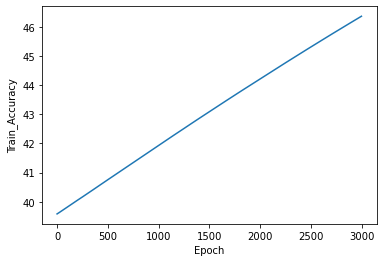

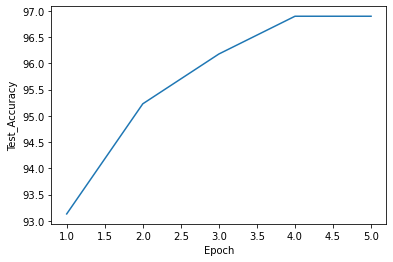

Learning Rate 1 Accuracy of the network on the 10000 test images: 31.3 %
Learning Rate 1 Accuracy of the network on the 10000 test images: 78.54 %
Learning Rate 1 Accuracy of the network on the 10000 test images: 73.02 %
Learning Rate 1 Accuracy of the network on the 10000 test images: 90.71 %
Learning Rate 1 Accuracy of the network on the 10000 test images: 92.87 %


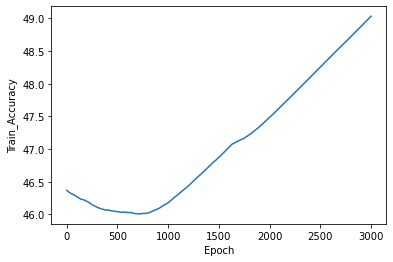

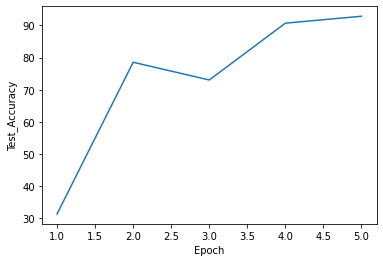

In [31]:
# Your code goes here
# Your code goes here
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from d2l import torch as d2l
from torch import nn
import torch.nn as nn

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = [0,0.0001,0.001,0.01,0.1,1]

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 300)  
        self.fc3 =  nn.Linear(300, num_classes) 
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out 
# *1* the training part of code can keep unchanged

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
# SGD in 2 hidden layer

for learningRate in learning_rate:
    Test_Accuracy = []
    Train_Accuracy = []
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)


    # Train the model
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):  
            # Move tensors to the configured device
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # acc
            _, predictedTr = torch.max(outputs.data, 1)
            totalTr += labels.size(0)
            correctTr += (predictedTr == labels).sum().item()
            Train_Accuracy.append(100 * correctTr / totalTr)  
    #         if (i+1) % 100 == 0:
    #             print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
    #                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

        # Test the model
        # In test phase, we don't need to compute gradients (for memory efficiency)
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.reshape(-1, 28*28).to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            Test_Accuracy.append(100 * correct / total)
            print('Learning Rate', learningRate, 'Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

        
# *2* Code for plotting results
### Your code goes here
###     
    plt.plot([i for i in range(3000)], Train_Accuracy)
    plt.xlabel('Epoch')
    plt.ylabel('Train_Accuracy')
    plt.show()


    plt.plot([1,2,3,4,5], Test_Accuracy)
    plt.xlabel('Epoch')
    plt.ylabel('Test_Accuracy')
    plt.show()
       
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

## 2.12. (To finish) Use Adam to train your two-hidden-layer network with different learning rate values in the range of $\{ 0, 0.0001, 0.001, 0.01, 0.1, 1 \}$, and show which learning rate achieves the best testing accuracy.

Learning Rate 0 Accuracy of the network on the 10000 test images: 10.94 %
Learning Rate 0 Accuracy of the network on the 10000 test images: 10.94 %
Learning Rate 0 Accuracy of the network on the 10000 test images: 10.94 %
Learning Rate 0 Accuracy of the network on the 10000 test images: 10.94 %
Learning Rate 0 Accuracy of the network on the 10000 test images: 10.94 %


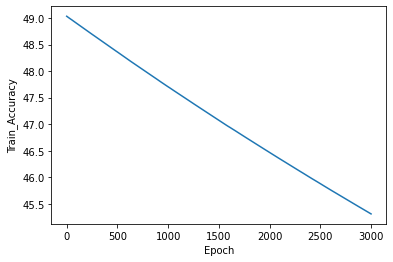

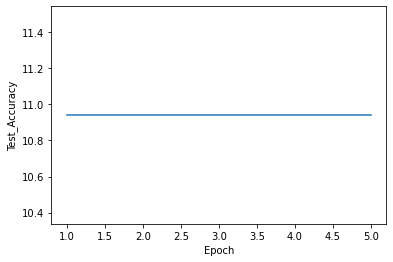

Learning Rate 0.0001 Accuracy of the network on the 10000 test images: 91.71 %
Learning Rate 0.0001 Accuracy of the network on the 10000 test images: 93.75 %
Learning Rate 0.0001 Accuracy of the network on the 10000 test images: 94.53 %
Learning Rate 0.0001 Accuracy of the network on the 10000 test images: 95.45 %
Learning Rate 0.0001 Accuracy of the network on the 10000 test images: 96.0 %


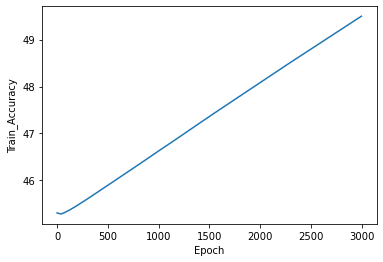

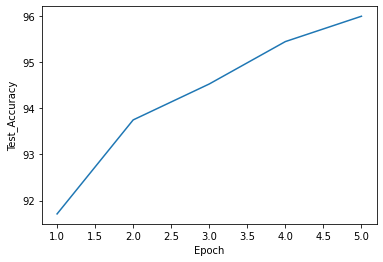

Learning Rate 0.001 Accuracy of the network on the 10000 test images: 96.99 %
Learning Rate 0.001 Accuracy of the network on the 10000 test images: 97.69 %
Learning Rate 0.001 Accuracy of the network on the 10000 test images: 97.64 %
Learning Rate 0.001 Accuracy of the network on the 10000 test images: 97.9 %
Learning Rate 0.001 Accuracy of the network on the 10000 test images: 97.92 %


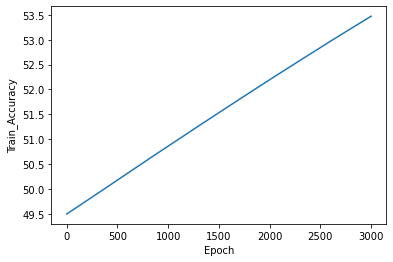

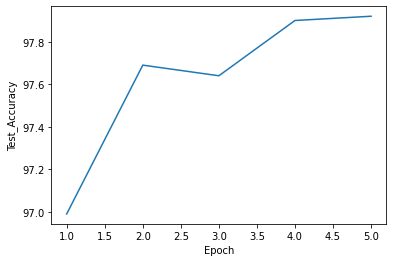

Learning Rate 0.01 Accuracy of the network on the 10000 test images: 94.82 %
Learning Rate 0.01 Accuracy of the network on the 10000 test images: 95.92 %
Learning Rate 0.01 Accuracy of the network on the 10000 test images: 96.56 %
Learning Rate 0.01 Accuracy of the network on the 10000 test images: 96.89 %
Learning Rate 0.01 Accuracy of the network on the 10000 test images: 96.37 %


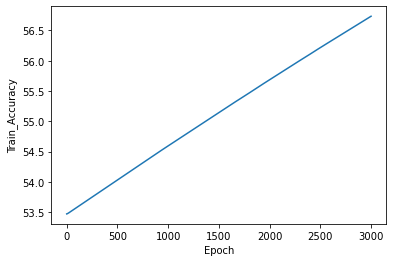

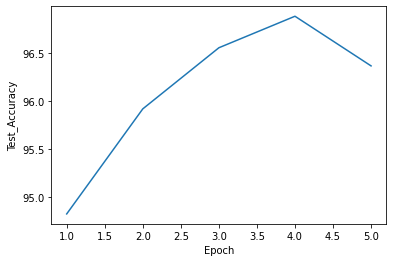

Learning Rate 0.1 Accuracy of the network on the 10000 test images: 9.58 %
Learning Rate 0.1 Accuracy of the network on the 10000 test images: 10.28 %
Learning Rate 0.1 Accuracy of the network on the 10000 test images: 10.32 %
Learning Rate 0.1 Accuracy of the network on the 10000 test images: 11.35 %
Learning Rate 0.1 Accuracy of the network on the 10000 test images: 9.58 %


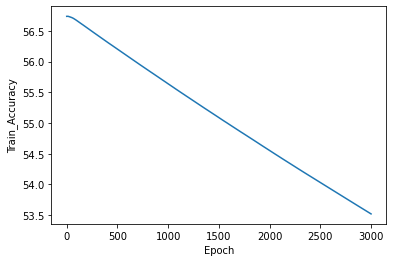

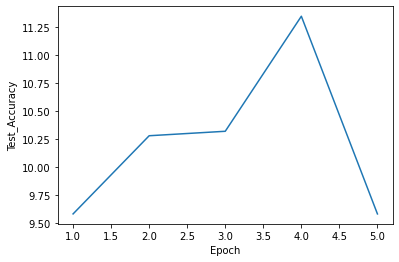

Learning Rate 1 Accuracy of the network on the 10000 test images: 9.82 %
Learning Rate 1 Accuracy of the network on the 10000 test images: 10.32 %
Learning Rate 1 Accuracy of the network on the 10000 test images: 11.35 %
Learning Rate 1 Accuracy of the network on the 10000 test images: 11.35 %
Learning Rate 1 Accuracy of the network on the 10000 test images: 10.32 %


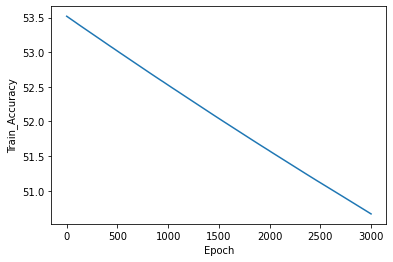

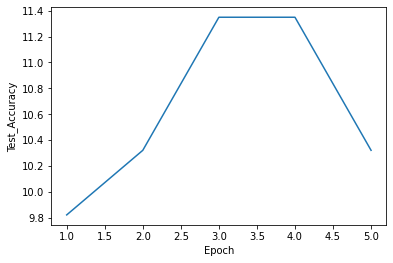

In [32]:
# Your code goes here
# Your code goes here
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from d2l import torch as d2l
from torch import nn
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = [0,0.0001,0.001,0.01,0.1,1]

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 300)  
        self.fc3 =  nn.Linear(300, num_classes) 
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out  

# *1* the training part of code can keep unchanged

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
# SGD in 2 hidden layer

for learningRate in learning_rate:
    Test_Accuracy = []
    Train_Accuracy = []

    optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)


    # Train the model
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):  
            # Move tensors to the configured device
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # acc
            _, predictedTr = torch.max(outputs.data, 1)
            totalTr += labels.size(0)
            correctTr += (predictedTr == labels).sum().item()
            Train_Accuracy.append(100 * correctTr / totalTr)  
    #         if (i+1) % 100 == 0:
    #             print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
    #                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

        # Test the model
        # In test phase, we don't need to compute gradients (for memory efficiency)
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.reshape(-1, 28*28).to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            Test_Accuracy.append(100 * correct / total)
            print('Learning Rate', learningRate, 'Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

        
# *2* Code for plotting results
### Your code goes here
###     
    plt.plot([i for i in range(3000)], Train_Accuracy)
    plt.xlabel('Epoch')
    plt.ylabel('Train_Accuracy')
    plt.show()


    plt.plot([1,2,3,4,5], Test_Accuracy)
    plt.xlabel('Epoch')
    plt.ylabel('Test_Accuracy')
    plt.show()
      
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

## 2.13. (To finish) Change the dimension of the hidden variable (*hidden_size*) from $500$ to $100, 1000, 2000$, train the corresponding networks, and show the difference of them in testing accuracy.

Question: how the dimension of hidden variable impacts the performance?

Epoch [1/5], Step [100/600], Loss: 0.4472
Epoch [1/5], Step [200/600], Loss: 0.2585
Epoch [1/5], Step [300/600], Loss: 0.2121
Epoch [1/5], Step [400/600], Loss: 0.2796
Epoch [1/5], Step [500/600], Loss: 0.2495
Epoch [1/5], Step [600/600], Loss: 0.3548
Accuracy of the network on the 10000 test images: 94.84 %
Epoch [2/5], Step [100/600], Loss: 0.0584
Epoch [2/5], Step [200/600], Loss: 0.0657
Epoch [2/5], Step [300/600], Loss: 0.1337
Epoch [2/5], Step [400/600], Loss: 0.0880
Epoch [2/5], Step [500/600], Loss: 0.1402
Epoch [2/5], Step [600/600], Loss: 0.1301
Accuracy of the network on the 10000 test images: 96.28 %
Epoch [3/5], Step [100/600], Loss: 0.0785
Epoch [3/5], Step [200/600], Loss: 0.1181
Epoch [3/5], Step [300/600], Loss: 0.0313
Epoch [3/5], Step [400/600], Loss: 0.0525
Epoch [3/5], Step [500/600], Loss: 0.0730
Epoch [3/5], Step [600/600], Loss: 0.1434
Accuracy of the network on the 10000 test images: 97.07 %
Epoch [4/5], Step [100/600], Loss: 0.0534
Epoch [4/5], Step [200/600],

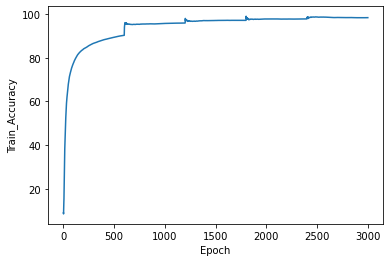

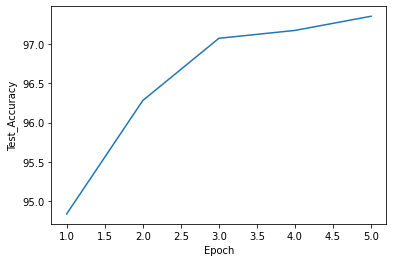

Epoch [1/5], Step [100/600], Loss: 0.2060
Epoch [1/5], Step [200/600], Loss: 0.2265
Epoch [1/5], Step [300/600], Loss: 0.2216
Epoch [1/5], Step [400/600], Loss: 0.1089
Epoch [1/5], Step [500/600], Loss: 0.1360
Epoch [1/5], Step [600/600], Loss: 0.0899
Accuracy of the network on the 10000 test images: 96.74 %
Epoch [2/5], Step [100/600], Loss: 0.0647
Epoch [2/5], Step [200/600], Loss: 0.0675
Epoch [2/5], Step [300/600], Loss: 0.0755
Epoch [2/5], Step [400/600], Loss: 0.1293
Epoch [2/5], Step [500/600], Loss: 0.1172
Epoch [2/5], Step [600/600], Loss: 0.0503
Accuracy of the network on the 10000 test images: 97.29 %
Epoch [3/5], Step [100/600], Loss: 0.0492
Epoch [3/5], Step [200/600], Loss: 0.0277
Epoch [3/5], Step [300/600], Loss: 0.0104
Epoch [3/5], Step [400/600], Loss: 0.0480
Epoch [3/5], Step [500/600], Loss: 0.0807
Epoch [3/5], Step [600/600], Loss: 0.0662
Accuracy of the network on the 10000 test images: 97.69 %
Epoch [4/5], Step [100/600], Loss: 0.0320
Epoch [4/5], Step [200/600],

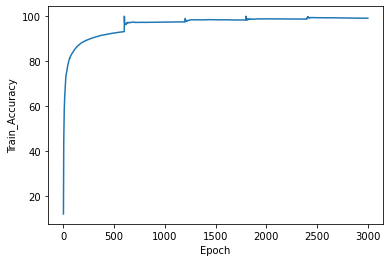

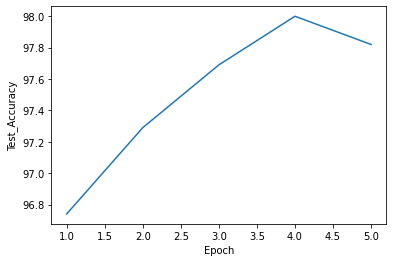

Epoch [1/5], Step [100/600], Loss: 0.1786
Epoch [1/5], Step [200/600], Loss: 0.1506
Epoch [1/5], Step [300/600], Loss: 0.2022
Epoch [1/5], Step [400/600], Loss: 0.1770
Epoch [1/5], Step [500/600], Loss: 0.2174
Epoch [1/5], Step [600/600], Loss: 0.1679
Accuracy of the network on the 10000 test images: 97.24 %
Epoch [2/5], Step [100/600], Loss: 0.0233
Epoch [2/5], Step [200/600], Loss: 0.0451
Epoch [2/5], Step [300/600], Loss: 0.0300
Epoch [2/5], Step [400/600], Loss: 0.0577
Epoch [2/5], Step [500/600], Loss: 0.0753
Epoch [2/5], Step [600/600], Loss: 0.1011
Accuracy of the network on the 10000 test images: 97.74 %
Epoch [3/5], Step [100/600], Loss: 0.0589
Epoch [3/5], Step [200/600], Loss: 0.0211
Epoch [3/5], Step [300/600], Loss: 0.1008
Epoch [3/5], Step [400/600], Loss: 0.0167
Epoch [3/5], Step [500/600], Loss: 0.0914
Epoch [3/5], Step [600/600], Loss: 0.1049
Accuracy of the network on the 10000 test images: 97.74 %
Epoch [4/5], Step [100/600], Loss: 0.0067
Epoch [4/5], Step [200/600],

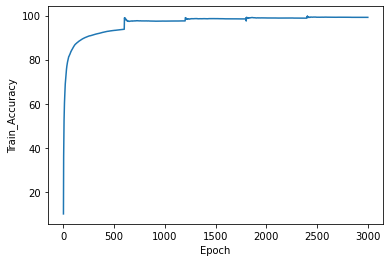

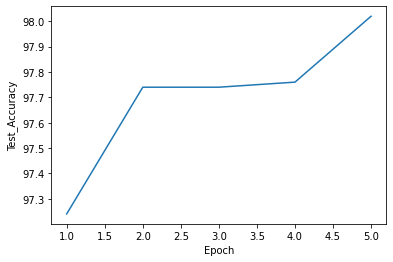

In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from d2l import mxnet as d2l
from mxnet import gluon, autograd, np, npx, gluon, nd, init
from IPython import display
from torch import nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import random

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = [100, 1000, 2000]
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 300) 
        self.fc3 =  nn.Linear(300, num_classes) 
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out
# *1* the training part of code can keep unchanged
for hiddensize in hidden_size:
    model = NeuralNet(input_size, hiddensize, num_classes).to(device)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    Test_Accuracy = []
    Train_Accuracy = []
    # Train the model
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        correctTr = 0
        totalTr = 0
        for i, (images, labels) in enumerate(train_loader):  
            # Move tensors to the configured device
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # acc
            _, predictedTr = torch.max(outputs.data, 1)
            totalTr += labels.size(0)
            correctTr += (predictedTr == labels).sum().item()
            Train_Accuracy.append(100 * correctTr / totalTr)  

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    #     print(Train_Accuracy)


    #     animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
    #                             legend=['train loss', 'train acc', 'test acc'])
        # Test the model
        # In test phase, we don't need to compute gradients (for memory efficiency)
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.reshape(-1, 28*28).to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            Test_Accuracy.append(100 * correct / total)
            print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


    # *2* Code for plotting results
    ### Your code goes here
    ###   

    plt.plot([i for i in range(3000)], Train_Accuracy)
    plt.xlabel('Epoch')
    plt.ylabel('Train_Accuracy')
    plt.show()


    plt.plot([1,2,3,4,5], Test_Accuracy)
    plt.xlabel('Epoch')
    plt.ylabel('Test_Accuracy')
    plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

## 2.13. (To finish) Is the best learning rate for SGD the same with the best learning rate for Adam?

No, compare with 2.11 and 2.12. SGD best Learning rate is 0.1, but Adam best Learning rate is 0.01.